<a href="https://colab.research.google.com/github/hjn14133/STAT/blob/main/Z_score_CI_Var_Subplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy.stats as st
import pandas as pd


In [2]:
#data = pd.read_csv('firetowerFiber_USDA.csv')
#data = pd.read_csv('FT_join_file.csv')
data = pd.read_csv('FT_join_JH.csv')

In [3]:

variety = data['Variety_1']

variety.unique()

array(['           dp 1646 b2xf', '            dg3799 b3xf',
       '            dg3615 b3xf'], dtype=object)

In [32]:
var_1 = data[data['Variety_1'] =='           dp 1646 b2xf']
var_2 = data[data['Variety_1'] =='            dg3799 b3xf']
var_3 = data[data['Variety_1'] =='            dg3615 b3xf']

feature1 = var_1['Lf']
feature2 = var_2['Lf']
feature3 = var_3['Lf']

In [33]:
import statistics

#  mean, standard deviation and standard error
#  For 1st variety
mean1  = np.mean(feature1)           # mean
sigma1 = statistics.stdev(feature1)  # standard deviation
sem1   = st.sem(feature1)   

print('mean of dp 1646 b2xf:\t\t\t{:.4f}'.format(mean1))
print('standard deviation of dp 1646 b2xf:\t{:.4f}'.format(sigma1))
print('standard error of dp 1646 b2xf:\t\t{:.4f}'.format(sem1))

confidenceLevel = .90
numOfTails      = 2
alpha           = (1 - confidenceLevel)/numOfTails

#  Percent Point Function
#  - calculates z-critical from (1-alpha)
z_critical = st.norm.ppf(1 - alpha)

# confidence Interval formula
lowerCI1 = mean1 - (z_critical * sigma1)
upperCI1 = mean1 + (z_critical * sigma1)

# For 2nd variety
mean2  = np.mean(feature2)           # mean
sigma2 = statistics.stdev(feature2)  # standard deviation
sem2   = st.sem(feature2)   

print('mean of dp dg3799 b3xf:\t\t\t{:.4f}'.format(mean2))
print('standard deviation of dg3799 b3xf:\t{:.4f}'.format(sigma2))
print('standard error of dg3799 b3xf:\t\t{:.4f}'.format(sem2))
# confidence Interval formula
lowerCI2 = mean2 - (z_critical * sigma2)
upperCI2 = mean2 + (z_critical * sigma2)

# For 3rd variety
mean3  = np.mean(feature3)           # mean
sigma3 = statistics.stdev(feature3)  # standard deviation
sem3   = st.sem(feature3)   

print('mean of dg3615 b3xf:\t\t\t{:.4f}'.format(mean3))
print('standard deviation of dg3615 b3xf:\t{:.4f}'.format(sigma3))
print('standard error of dg3615 b3xf:\t\t{:.4f}'.format(sem3))

# confidence Interval formula
lowerCI3 = mean3 - (z_critical * sigma3)
upperCI3 = mean3 + (z_critical * sigma3)

mean of dp 1646 b2xf:			2.8892
standard deviation of dp 1646 b2xf:	0.1478
standard error of dp 1646 b2xf:		0.0019
mean of dp dg3799 b3xf:			2.8923
standard deviation of dg3799 b3xf:	0.2077
standard error of dg3799 b3xf:		0.0031
mean of dg3615 b3xf:			2.9501
standard deviation of dg3615 b3xf:	0.0999
standard error of dg3615 b3xf:		0.0021


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

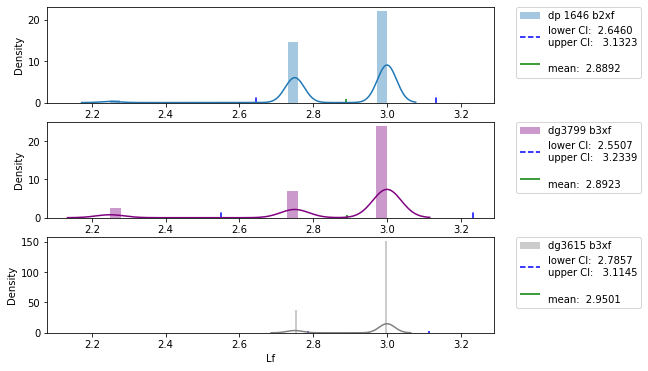

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np
from pylab import *

# usda micro
usda = 4.24

fig = plt.figure(figsize=(8, 6))
#fig.title('Micronaire for three varieties at Fire Tower Farm\nz-statistics - Confidence Level = {:.0%} '.format(confidenceLevel), fontsize=16)
#fig.xlabel('Micronaire')
#fig.ylabel('density')
#  PLOT CONFIDENCE INTERVAL
subplot(3,1,1)
labelCI1=("lower CI:  {:.4f}\nupper CI:   {:.4f}".format(lowerCI1,upperCI1))
labelCI=("upper CI: {:.4f}\n".format(upperCI1))
labelUS=("usda: {:.4f}".format(usda))
labelME=("\nmean:  {:.4f}".format(mean1))
ax1 = sns.distplot(feature1, hist=True, label = 'dp 1646 b2xf')
ax1.vlines([lowerCI1, upperCI1],0,np.mean(st.norm.pdf(feature1, loc=mean1, scale=sigma1)),label=labelCI1,color='blue',ls='--')
#ax1.vlines([usda],0,np.mean(st.norm.pdf(feature1, loc=mean1, scale=sigma1)),label=labelUS,color='red',ls='--')
ax1.vlines(mean1,0,np.mean(st.norm.pdf(feature1, loc=mean1, scale=sigma1)*.5),label=labelME,color='green')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#axvline(x=4.25, color = 'red', ls ='--')

subplot(3,1,2)
labelCI2=("lower CI:  {:.4f}\nupper CI:   {:.4f}".format(lowerCI2,upperCI2))
labelCI=("upper CI: {:.4f}\n".format(upperCI2))
labelUS=("usda: {:.4f}".format(usda))
labelME=("\nmean:  {:.4f}".format(mean2))
ax2 = sns.distplot(feature2, hist=True, color = 'purple', label = 'dg3799 b3xf')
ax2.vlines([lowerCI2, upperCI2],0,np.mean(st.norm.pdf(feature2, loc=mean2, scale=sigma2)),label=labelCI2,color='blue',ls='--')
#ax2.vlines([usda],0,np.mean(st.norm.pdf(feature2, loc=mean2, scale=sigma2)),label=labelUS,color='red',ls='--')
ax2.vlines(mean2,0,np.mean(st.norm.pdf(feature2, loc=mean2, scale=sigma2)*.5),label=labelME,color='green')
#ax.legend(loc='right', bbox_to_anchor=(1, 0.5))
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#axvline(x=4.25, color = 'red', ls ='--')

subplot(3,1,3)
labelCI3=("lower CI:  {:.4f}\nupper CI:   {:.4f}".format(lowerCI3,upperCI3))
labelCI=("upper CI: {:.4f}\n".format(upperCI3))
labelUS=("usda: {:.4f}".format(usda))
labelME=("\nmean:  {:.4f}".format(mean3))
ax3 = sns.distplot(feature3, hist=True, color = 'gray', label = 'dg3615 b3xf')
ax3.vlines([lowerCI3, upperCI3],0,np.mean(st.norm.pdf(feature3, loc=mean3, scale=sigma3)),label=labelCI3,color='blue',ls='--')
#ax3.vlines([usda],0,np.mean(st.norm.pdf(feature3,loc=mean3, scale=sigma3)),label=labelUS,color='red',ls='--')

ax3.vlines(mean3,0,np.mean(st.norm.pdf(feature3, loc=mean3, scale=sigma3)*.5),label=labelME,color='green')
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax_list = [ax1, ax2, ax3] #< your axes objects 
ax_list[0].get_shared_x_axes().join(*ax_list)
#axvline(x=4.25, color = 'red', ls ='--')
#fig.legend(labels=['dp 1646 b2xf','dg3799 b3xf', 'dg3615 b3xf'])
plt.show()


#print("Z-Statistics - CONCLUSION:")
#print("{:.0%} of the total patients in the Heart Disease UCI dataset will have cholesterol levels between {} and {}.".format(confidenceLevel, math.floor(lowerCI), math.ceil(upperCI)))